In [19]:
print("Hello World!")

Hello World!


tiny.cc/amlclass1


### Step 1: Import Libraries

In [20]:
import pandas as pd

### Step 2: Load Dataset

In [21]:
dataset = pd.read_csv('Data.csv')
dataset.head()

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,50000,Yes


In [22]:
features = ['Country', 'Age', 'Salary']
label = ['Purchased']

X = dataset[features]
y = dataset[label]

In [23]:
X

,Country,Age,Salary
0,France,44,72000
1,Spain,27,48000
2,Germany,30,54000
3,Spain,38,61000
4,Germany,40,50000
5,France,35,58000
6,Spain,20,52000
7,France,48,79000
8,Germany,50,83000
9,France,37,67000


### Step 3: Missing values

In [24]:
X.iloc[:,1:3]

,Age,Salary
0,44,72000
1,27,48000
2,30,54000
3,38,61000
4,40,50000
5,35,58000
6,20,52000
7,48,79000
8,50,83000
9,37,67000


In [25]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [26]:
imputer = imputer.fit(X.iloc[:,1:3])

In [27]:
X.iloc[:,1:3] = imputer.transform(X.iloc[:,1:3])

c:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [28]:
X.iloc[:,1:3]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,50000.0
5,35.0,58000.0
6,20.0,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


### Step 4: Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
labelEncoderX = LabelEncoder()
X.iloc[:, 0] = labelEncoderX.fit_transform(X.iloc[:,0]) 

c:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [30]:
labelEncoderY = LabelEncoder()
y = labelEncoderY.fit_transform(y)

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [31]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Step 5: Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Step 6: Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
X_train

array([[-0.90453403, -0.1860521 , -0.37745189],
       [-0.90453403,  0.93026051,  1.08029335],
       [-0.90453403,  1.42639945,  1.80916596],
       [ 0.30151134, -0.80622577, -0.79395053],
       [-0.90453403,  0.06201737,  0.55967005],
       [ 0.30151134,  0.43412157, -1.21044917],
       [ 1.50755672,  0.1860521 , -0.06507791],
       [ 1.50755672, -2.04657312, -1.00219985]])

In [36]:
X_test

array([[ 0.30151134,  1.67446892,  2.2256646 ],
       [ 1.50755672, -1.17832998, -1.41869849]])

In [37]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [38]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = model.predict(X_test)

In [40]:
y_pred, y_test

(array([1, 0]), array([0, 1]))

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

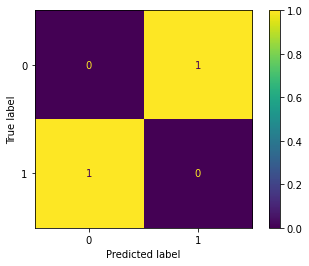

In [45]:
ConfusionMatrixDisplay(cm).plot()